# Assignment 2

In [ ]:
# I use Colab to code, so I also use Google Drive to load img!

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from PIL import Image
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter

## Define generate universal color table

In [ ]:
# Here I want to generate diffirent color in color table
def create_universal_color_table(num_of_color):
    colors = []
    # Because I do not what the image look like(pretend I did not see it before!)
    # The main idea is to design a table Include as wide a range of colours as possible
    # without over-considering the number of samples in a particular colour family

    # A three-channel picture implies a combination of three colours,
    # then each colour can be selected up to num_of_color^(1/3),
    # since the total number of colour pairs is num_of_red*num_of_blue*num_of_green.

    # Since the range of a single channel is 0~255,
    # I take int(num_of_color^(1/3)) colours in this range using the same step size,
    # and then combined the colours from each of the three channels to get the colour table
    color_num = int(np.cbrt(num_of_color))
    for r in np.linspace(0, num_of_color-1, color_num, dtype=int):
        for g in np.linspace(0, num_of_color-1, color_num, dtype=int):
            for b in np.linspace(0, num_of_color-1, color_num, dtype=int):
              colors.append((r, g, b))
    # return only num of colors in case
    return colors[:int(num_of_color)-1]

## Define generate adaptive color table

### First method is to count the frequency, which performance is not good

In [ ]:
def create_adaptive_color_table_by_frequency_counting(image, num_of_color):

    pixels = image.reshape(-1, 3)
    # convert pixel into type of tuple for key-value pair look up
    pixels = [tuple(pixel) for pixel in pixels]
    # count number of times each color appears
    color_counter = Counter(pixels)
    common_colors = color_counter.most_common(int(num_of_color))

    # return only the color we need
    adaptive_color_table = [color for color, _ in common_colors]

    return adaptive_color_table

### Then I notice K-Means, a method used to classify diffirent points in a feature space

In [ ]:
def kmeans(data, k, max_iters=100, tolerance=1e-4):

    # k means k point which near the center point
    # here k = num_of_color
    n_samples, n_features = data.shape
    centroids = data[np.random.choice(n_samples, k, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data[labels == z].mean(axis=0) for z in range(k)])

        if np.linalg.norm(new_centroids - centroids) < tolerance:
            break

        centroids = new_centroids

    return centroids, labels

def create_adaptive_color_table_by_kmeans(image, num_of_color):
    pixels = image.reshape(-1, 3)
    centroids, labels = kmeans(pixels, int(num_of_color))
    return centroids.astype(int)

### You can also use KMeans from sklearn.cluster

In [ ]:
# another simple method to imply  KMeans
# from sklearn.cluster import KMeans
# def create_adaptive_color_table_by_kmeans(image, num_of_color):
#     pixels = image.reshape(-1, 3)
#     kmeans = KMeans(n_clusters=int(num_of_color), n_init=10).fit(pixels)
#     return kmeans.cluster_centers_.astype(int)

## Define color search function
for both universal and adaptive color table

In [ ]:
def map_color_to_table(input_pixel_color, color_table):
    # calculate all the distance, find the index of shortest distence,
    # and return the color in universal color table which index point out
    distances = [np.sqrt((int(input_pixel_color[0])-int(c[0]))**2 + (int(input_pixel_color[1])-int(c[1]))**2 + (int(input_pixel_color[2])-int(c[2]))**2) for c in color_table]

    return color_table[np.argmin(distances)]

## Apply on Lena

In [ ]:
# apply on Lena.png
image = Image.open("Lena.png")
image_np = np.array(image)

# set number of color
num_of_color=256.0

## Using universal color table

In [ ]:
# generate universal color table
universal_color_table = create_universal_color_table(num_of_color)

image_universal = np.zeros_like(image_np)
for i in range(image_np.shape[0]):
    for j in range(image_np.shape[1]):
        image_universal[i, j] = map_color_to_table(image_np[i, j], universal_color_table)

## Using adaptive color table

In [ ]:
# generate adaptive color table
adaptive_color_table = create_adaptive_color_table_by_kmeans(image_np, int(num_of_color))

In [ ]:
image_adaptive = np.zeros_like(image_np)
for i in range(image_np.shape[0]):
    for j in range(image_np.shape[1]):
        image_adaptive[i, j] = map_color_to_table(image_np[i, j], adaptive_color_table)

## Draw images

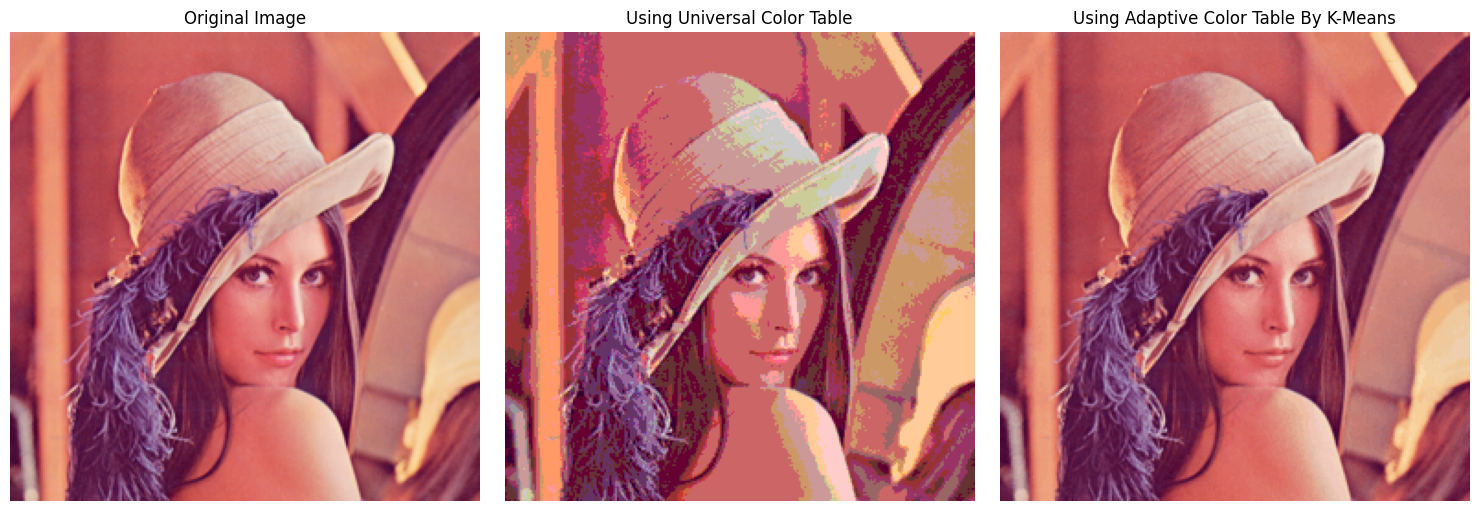

In [ ]:
# draw all the images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(image_universal)
plt.title('Using Universal Color Table')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_adaptive)
plt.title('Using Adaptive Color Table By K-Means')
plt.axis('off')

plt.tight_layout()
plt.show()

## Plot color table and save them

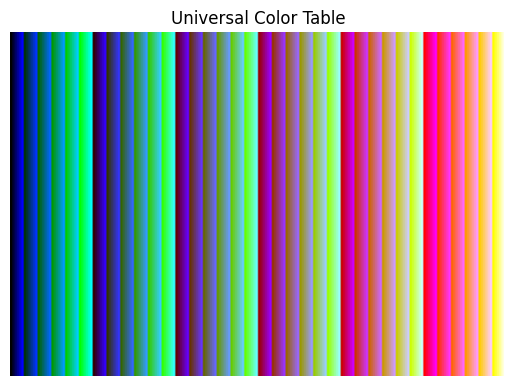

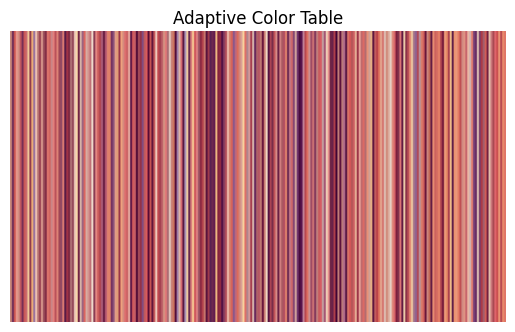

In [ ]:
def plot_color_table(color_table, title, filename):

    num_colors = len(color_table)
    table_img = np.zeros((150, num_colors, 3), dtype=np.uint8)

    for i, color in enumerate(color_table):
        table_img[:, i, :] = color

    plt.imshow(table_img)
    plt.axis('off')
    plt.title(title)
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show()

plot_color_table(universal_color_table, title = "Universal Color Table", filename="universal_color_table.png")
plot_color_table(adaptive_color_table, title = "Adaptive Color Table", filename="adaptive_color_table.png")


## Save images

In [ ]:
image_universal_pil = Image.fromarray(image_universal)
image_universal_pil.save('image_universal.png')

image_adaptive_pil = Image.fromarray(image_adaptive)
image_adaptive_pil.save('image_adaptive.png')